Tiempo total acumulado: 0.03791499137878418 segundos


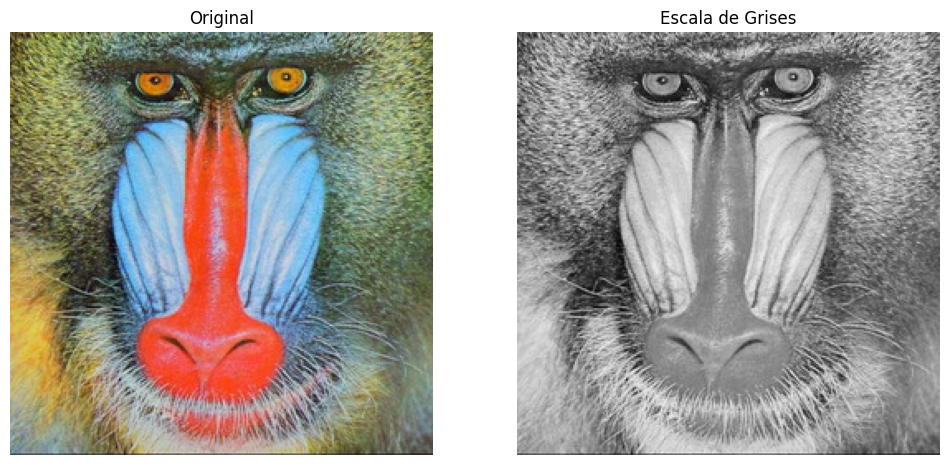

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imageio
import time
from scipy.stats import multivariate_normal
%matplotlib inline

tiempo_acumulado = 0
start_time = time.time()
# leer la imagen de Baboo original
imagen_original = mpimg.imread("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/baboon.jpg")
# Debemos cumplir con la siguiente formula g(x,y) = f(x,y)h(x,y)+n(x)
# Convertir la imagen de Baboo original a escala de grises. Ésta será nuestra f(x,y)
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

Tiempo total acumulado: 0.07381820678710938 segundos


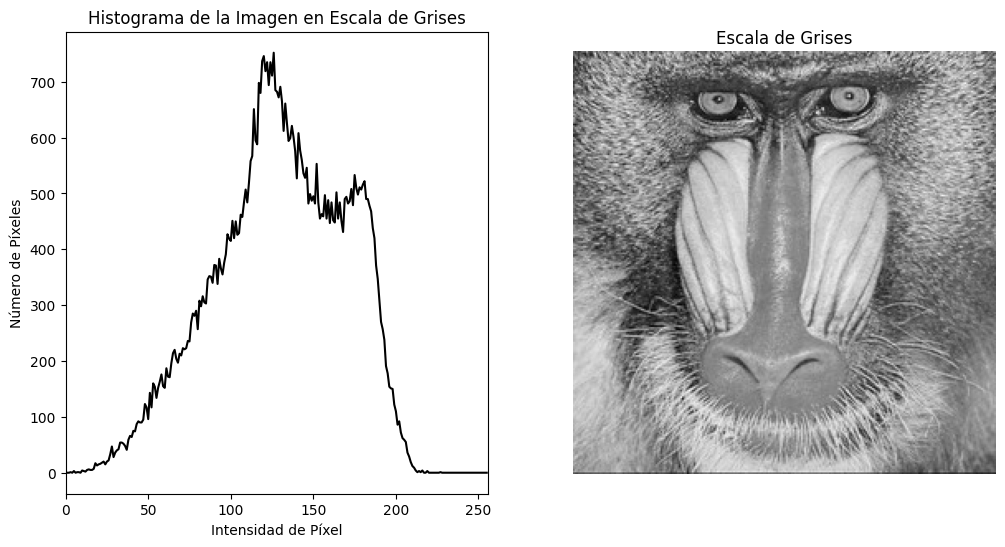

In [2]:
# Calcular el histograma de la imagen en escala de grises
start_time = time.time()

histograma = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma, color='black')
plt.title("Histograma de la Imagen en Escala de Grises")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_gris, cmap="gray")
plt.title("Escala de Grises")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

Tiempo total acumulado: 0.12468147277832031 segundos


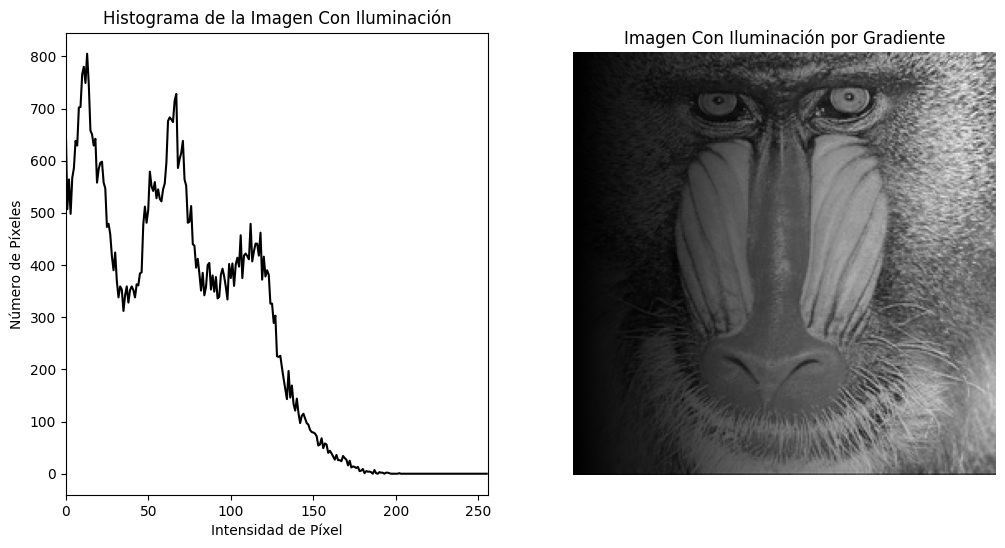

In [3]:
# Ahora realizaremos la operación f(x,y)g(x,y)
start_time = time.time()


# Agregamos el factor de iluminación a la imagen en escala de grises
def generar_sombreado(imagen_gris):
    filas, columnas = imagen_gris.shape[:2]
    sombreado = np.ones((filas, columnas), dtype=np.float32)
    # Crear un gradiente horizontal para simular el sombreado
    for i in range(columnas):
        sombreado[:, i] *= i / columnas
    return sombreado

# Generar y aplicar sombreado ficticio
sombreado = generar_sombreado(imagen_gris)
imagen_sombreada = cv2.multiply(imagen_gris.astype(np.float32), sombreado[:, :, np.newaxis])

#cv2.imwrite("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/imagen_con_ruido_baboon_gradiente.jpg", imagen_sombreada)

# Calcular el histograma de la imagen en escala de grises con factor de iluminación
histograma_sombreado = cv2.calcHist([imagen_sombreada], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado, color='black')
plt.title("Histograma de la Imagen Con Iluminación")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

plt.subplot(1, 2, 2)
plt.imshow(imagen_sombreada, cmap="gray")
plt.title("Imagen Con Iluminación por Gradiente")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

Tiempo total acumulado: 0.16474223136901855 segundos


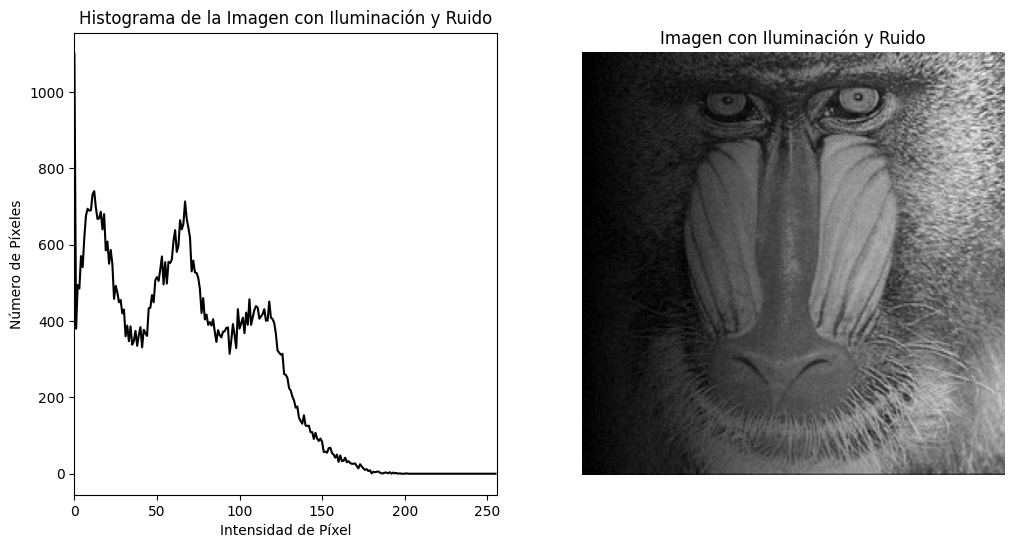

In [4]:
# Efectuamos ahora f(x,y)g(x,y)+n(x,y). f(x,y)g(x,y) se consiguió en el paso anterior. De esta forma tendremos completo nuestra formula g(x,y) = f(x,y)h(x,y)+n(x)
# Denominaremos a g(x,y) con el alias imagen_con_ruido
start_time = time.time()


# Agregamos ruido gaussiano a la imagen generada con gradiente
def anadir_ruido_gaussiano(imagen_sombreada):
    filas, columnas = imagen_sombreada.shape

    # Generar el ruido gaussiano
    media = 0
    varianza = 10
    sigma = varianza ** 0.5

    # Crear una matriz de ruido gaussiano del mismo tamaño que la imagen
    ruido_gaussiano = np.random.normal(media, sigma, (filas, columnas)).reshape(filas, columnas)

    # Añadir el ruido a la imagen original
    imagen_con_ruido = cv2.add(imagen_sombreada.astype(np.float32), ruido_gaussiano.astype(np.float32))

    return imagen_con_ruido

# Se añade ruido a la imagen
imagen_con_ruido = anadir_ruido_gaussiano(imagen_sombreada)

# Convertir la imagen con ruido a un formato válido (uint8) y asegurar que los valores estén en el rango correcto
imagen_con_ruido = np.clip(imagen_con_ruido, 0, 255)

# Calcular el histograma de g(x,y)
histograma_sombreado_ruido = cv2.calcHist([imagen_con_ruido], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(histograma_sombreado_ruido, color='black')
plt.title("Histograma de la Imagen con Iluminación y Ruido")
plt.xlabel("Intensidad de Píxel")
plt.ylabel("Número de Píxeles")
plt.xlim([0, 256])

# Mostrar la imagen ecualizada en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(imagen_con_ruido, cmap="gray")
plt.title("Imagen con Iluminación y Ruido")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

Tiempo total acumulado: 0.32465505599975586 segundos


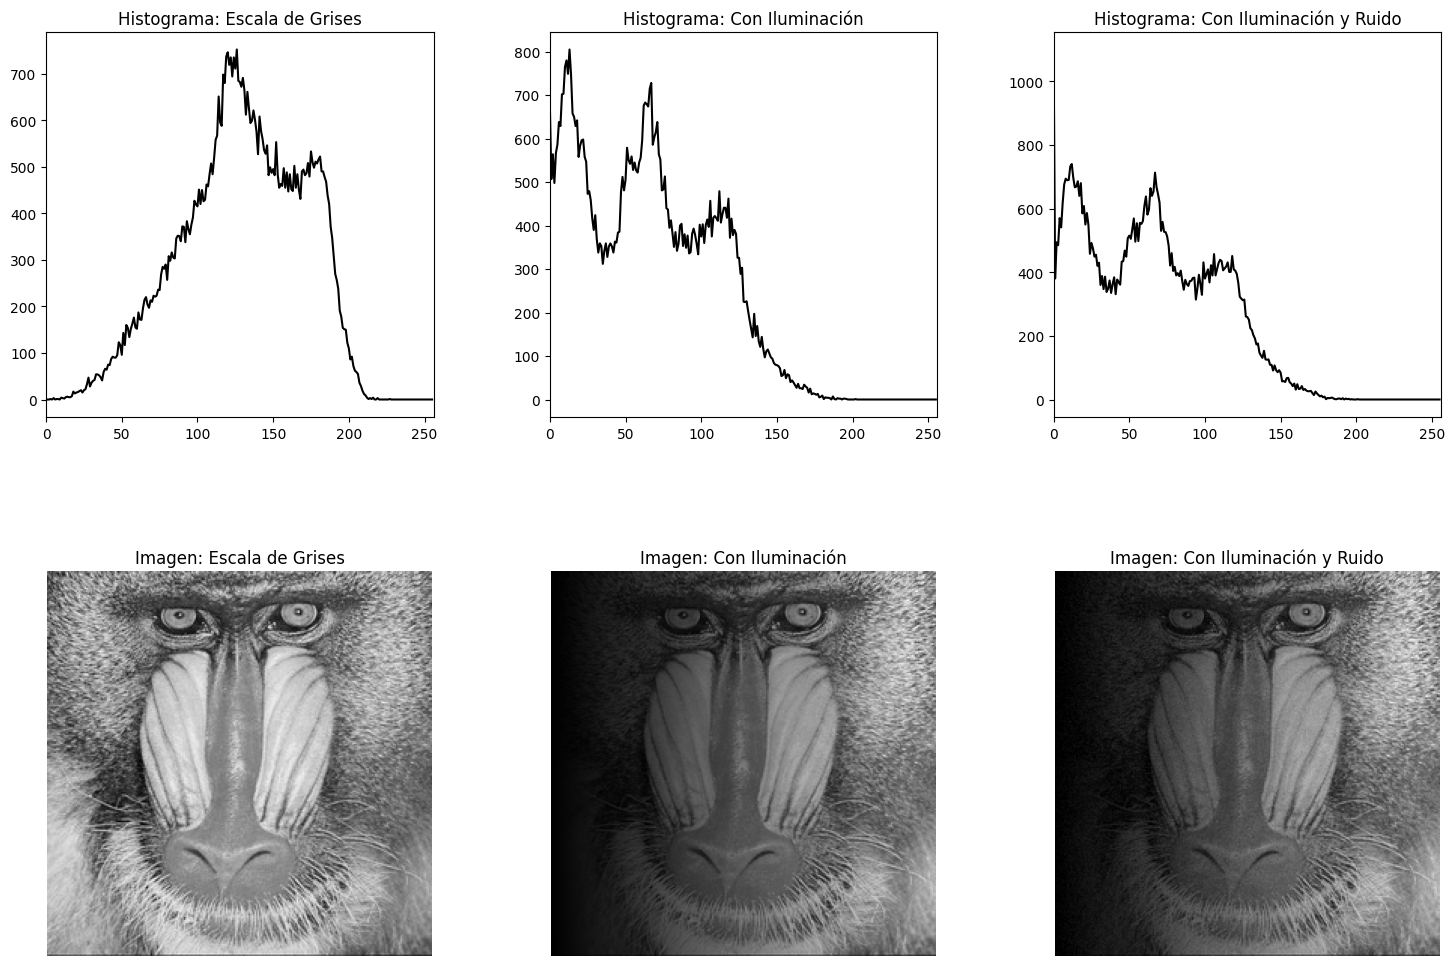

In [5]:
# Configura la figura para tener 2 filas y 3 columnas, ajustando el tamaño total
start_time = time.time()

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Ajustar el espacio entre gráficos
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Primer par: Histograma e imagen en escala de grises
axs[0, 0].plot(histograma, color='black')
axs[0, 0].set_title("Histograma: Escala de Grises")
axs[0, 0].set_xlim([0, 256])

axs[1, 0].imshow(imagen_gris, cmap="gray")
axs[1, 0].set_title("Imagen: Escala de Grises")
axs[1, 0].axis('off')

# Segundo par: Histograma e imagen con iluminación
axs[0, 1].plot(histograma_sombreado, color='black')
axs[0, 1].set_title("Histograma: Con Iluminación")
axs[0, 1].set_xlim([0, 256])

axs[1, 1].imshow(imagen_sombreada, cmap="gray")
axs[1, 1].set_title("Imagen: Con Iluminación")
axs[1, 1].axis('off')

# Tercer par: Histograma e imagen con iluminación y ruido
axs[0, 2].plot(histograma_sombreado_ruido, color='black')
axs[0, 2].set_title("Histograma: Con Iluminación y Ruido")
axs[0, 2].set_xlim([0, 256])

axs[1, 2].imshow(imagen_con_ruido, cmap="gray")
axs[1, 2].set_title("Imagen: Con Iluminación y Ruido")
axs[1, 2].axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

%matplotlib qt5

# Función polinomial de segundo orden
def polynomial_second_order(x, a0, a1, a2, a3, a4, a5):
    return a0 + a1 * x[0] + a2 * x[1] + a3 * x[0]**2 + a4 * x[1]**2 + a5 * x[0] * x[1]

# Función para dividir la imagen en segmentos
def divide_image(image, segment_size):
    segments = []
    height, width = image.shape
    for y in range(0, height, segment_size):
        for x in range(0, width, segment_size):
            segment = image[y:y+segment_size, x:x+segment_size]
            segments.append(segment)
    return segments

# Función para ajustar polinomio de segundo orden en un segmento
def fit_segment(segment):
    height, width = segment.shape
    x = np.arange(width)
    y = np.arange(height)
    xx, yy = np.meshgrid(x, y)
    x_data = np.vstack((xx.ravel(), yy.ravel()))
    intensity_values = segment.ravel()

    # Construir la matriz A
    A = np.array([
        [1, x, y, x**2, y**2, x*y]
        for x, y in zip(x_data[0], x_data[1])
    ])

    # Calcular A^T * A
    A_transpose_A = np.dot(A.T, A)

    # Calcular A^T * y
    A_transpose_y = np.dot(A.T, intensity_values)

    # Resolver el sistema de ecuaciones lineales
    coefficients = np.dot(inv(A_transpose_A), A_transpose_y)

    return coefficients

# Función para estimar los coeficientes de degradación para cada segmento
def estimate_degradation(image, segment_size):
    segments = divide_image(image, segment_size)
    degradation_coefficients = []
    for segment in segments:
        coefficients = fit_segment(segment)
        degradation_coefficients.append(coefficients)
    return degradation_coefficients

# Ajustar la imagen completa
image = imagen_con_ruido
segment_size = 32  # Tamaño del segmento
degradation_coefficients = estimate_degradation(image, segment_size)

# Tomar el promedio de los coeficientes de todos los segmentos
average_coefficients = np.mean(degradation_coefficients, axis=0)

# Coeficientes del ajuste promedio
a0_avg, a1_avg, a2_avg, a3_avg, a4_avg, a5_avg = average_coefficients

# Ajustar los coeficientes de manera que la función estimada esté en el rango de 0 a 255
# Suponiendo que los coeficientes ya están en el rango correcto, no es necesario hacer ajustes adicionales

# Crear la función estimada h_hat(x, y)
def estimated_function(x, y):
    return a0_avg + a1_avg * x + a2_avg * y + a3_avg * x**2 + a4_avg * y**2 + a5_avg * x * y


print("Coeficientes promedio del ajuste:")
print("a0:", a0_avg)
print("a1:", a1_avg)
print("a2:", a2_avg)
print("a3:", a3_avg)
print("a4:", a4_avg)
print("a5:", a5_avg)

# Crear una malla de puntos para evaluar la función estimada
x = np.linspace(0, image.shape[1]-1, image.shape[1])
y = np.linspace(0, image.shape[0]-1, image.shape[0])
xx, yy = np.meshgrid(x, y)

# Evaluar la función estimada en la malla de puntos
estimated_image = estimated_function(xx, yy)

# Limitar los valores de la imagen estimada al rango de 0 a 255
estimated_image = np.clip(estimated_image, 0, 255)

# Dividir la imagen original por la función estimada
reconstructed_image = image / estimated_image

# Mostrar la imagen original, la función estimada y la imagen reconstruida
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 3, 2)
plt.imshow(estimated_image, cmap='gray')
plt.title('Función estimada')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Imagen reconstruida')

plt.show()

Coeficientes promedio del ajuste:
a0: 55.92676439685903
a1: 0.7302189952172645
a2: -0.030698846504128907
a3: -0.007113379465563079
a4: 0.0013963932541302222
a5: -0.002770242838373702


C:\Users\luisl\AppData\Local\Temp\ipykernel_13404\1187484785.py:95: RuntimeWarning: divide by zero encountered in divide
  reconstructed_image = image / estimated_image


In [7]:
# Una vez que tenemos nuestra h_estimada(x,y) procederemos a obtener nuestra f_estimada(x,y). Para obtener f_estimada(x,y) vamos a realizar una división de nuestra g(x,y)/h_estimada(x,y)
start_time = time.time()


# Generar las coordenadas x e y para cada píxel de la imagen
rows, cols = imagen_con_ruido.shape
x = np.arange(cols)
y = np.arange(rows)
X, Y = np.meshgrid(x, y)

# Calcular la inversa de la función de degradación estimada para cada píxel de la imagen
h_inv_estimada = 1.0 / polynomial_second_order((X.flatten(), Y.flatten()), *coefficients)
h_inv_estimada = h_inv_estimada.reshape(imagen_con_ruido.shape)

# Asegurar que no haya divisiones por cero
h_inv_estimada[np.isinf(h_inv_estimada)] = 0

# Calcular la f_estimada(x, y)
f_estimada = imagen_con_ruido * h_inv_estimada

#histograma_f_estimada = cv2.calcHist([f_estimada], [0], None, [256], [0, 256])
#cv2.imwrite("C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/FPB_Baboon_Gradiente_fEstimada.jpg", f_estimada)

plt.figure(figsize=(12, 6))



plt.subplot(1, 2, 2)
plt.imshow(f_estimada, cmap="gray")
plt.title("f(x,y) Estimada")
plt.axis('off')

end_time = time.time()
tiempo_acumulado += end_time - start_time

print("Tiempo total acumulado:", tiempo_acumulado, "segundos")

plt.show()

NameError: name 'coefficients' is not defined